In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
hotel_data = pd.read_csv('/content/drive/MyDrive/Organizacion De Datos/Otros/Hotel Reservations.csv')

In [ ]:
hotel_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Understanding the Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'price - previous booking relation'),
 Text(0.5, 0, 'average price (euros)'),
 Text(0, 0.5, ' days since booking until arrival')]

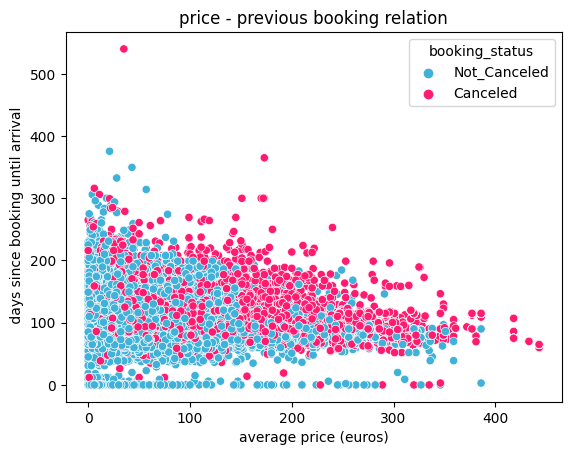

In [ ]:
sns.scatterplot(data = hotel_data, x = 'lead_time' , y = 'avg_price_per_room', hue = 'booking_status', palette = {'Not_Canceled':'#40b2d9', 'Canceled':'#ff1c70'}).set(
    title = 'price - previous booking relation', xlabel = 'average price (euros)', ylabel = ' days since booking until arrival'
)

In [ ]:
parking_relation = hotel_data.groupby(['required_car_parking_space', 'booking_status']).agg({'booking_status':['count']})

In [ ]:
parking_relation = parking_relation.reset_index()
parking_relation.columns = ['parking_required' , 'booking_status','total']
parking_relation['parking_required'] = parking_relation['parking_required'].map({0:'no', 1:'yes'})

[Text(0.5, 1.0, 'Cancelations if parking required')]

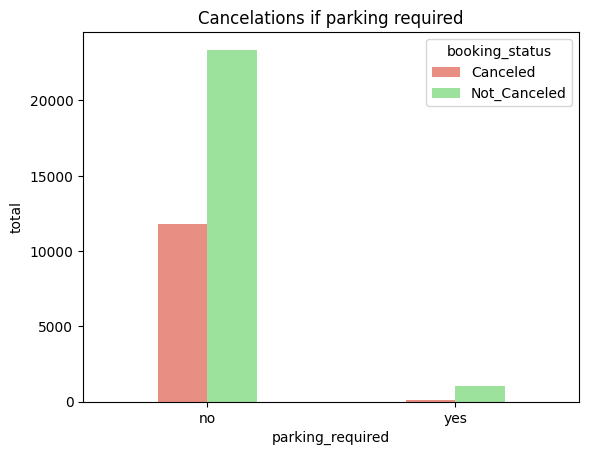

In [ ]:
sns.barplot(data = parking_relation , x = 'parking_required', y = 'total', hue = 'booking_status', width=0.4,
            palette={'Canceled':'Salmon', 'Not_Canceled':'Lightgreen'}).set(title = "Cancelations if parking required")

In [ ]:
cancellations_variation = hotel_data.groupby(['no_of_previous_cancellations', 'booking_status']).agg({'booking_status':['count']})

In [ ]:
cancellations_variation = cancellations_variation.unstack()

In [ ]:
cancellations_variation = cancellations_variation.reset_index()
cancellations_variation.columns = ['previous_cancel', 'canceled', 'not_canceled']
cancellations_variation = cancellations_variation.fillna(0)

In [ ]:
cancellations_variation['prob_cancelation'] = cancellations_variation['canceled']*100 / (cancellations_variation['not_canceled'] + cancellations_variation['canceled'])

[Text(0.5, 1.0, 'probability of cancelation based on previous cancelations')]

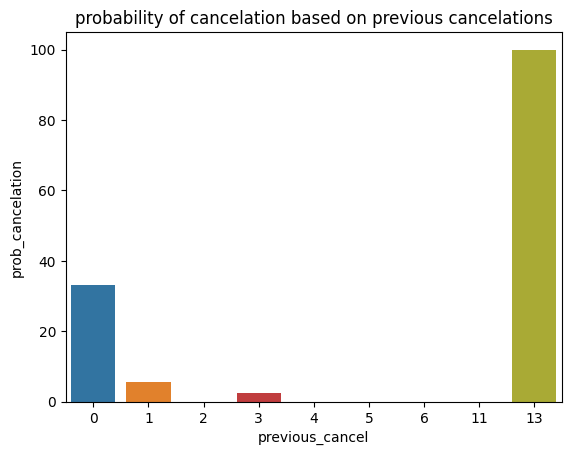

In [ ]:
sns.barplot(data = cancellations_variation, x = 'previous_cancel', y = 'prob_cancelation').set(title = 'probability of cancelation based on previous cancelations')

In [ ]:
year_group = hotel_data.groupby(['arrival_year', 'booking_status']).agg({'booking_status':['count']})

In [ ]:
year_group = year_group.reset_index()
year_group.columns = ['year', 'status', 'total']

[Text(0.5, 1.0, 'Amount of bookings by year')]

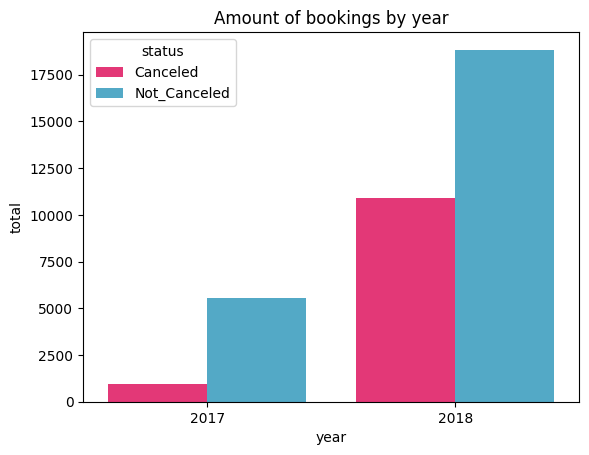

In [ ]:
sns.barplot(data = year_group, x = 'year', y = 'total', hue = 'status', palette = {'Not_Canceled':'#40b2d9', 'Canceled':'#ff1c70'}).set(title = 'Amount of bookings by year')

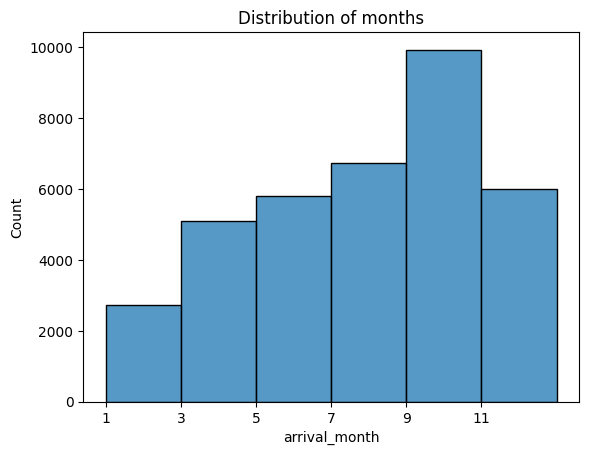

In [ ]:
sns.histplot(data = hotel_data, x = 'arrival_month', binwidth = 2).set(title = 'Distribution of months', xticks =(range(1,13,2)) )
plt.show()

In [ ]:
month_group = hotel_data.groupby(['arrival_month','booking_status']).agg({'booking_status':['count']})

In [ ]:
month_group = month_group.reset_index()
month_group.columns = ['arrival_month', 'status', 'total']

[Text(0.5, 1.0, 'Status by month')]

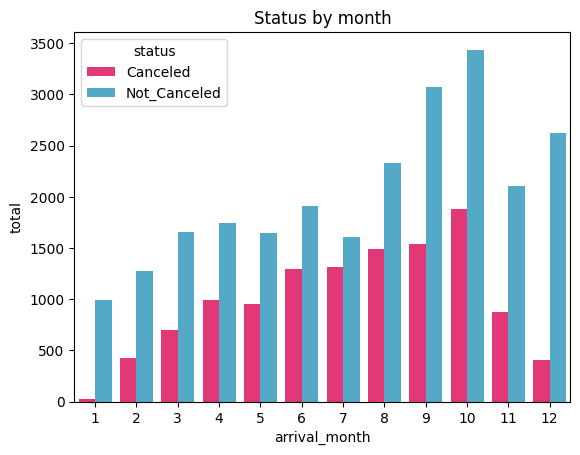

In [ ]:
sns.barplot(data = month_group, x = 'arrival_month' , y = 'total' , hue = 'status',palette = {'Not_Canceled':'#40b2d9', 'Canceled':'#ff1c70'}).set(title = 'Status by month')

# Feature engineering

## Inputing

In [ ]:
hotel_data.isna().sum() # Check missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
hotel_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
hotel_data['no_of_previous_bookings_not_canceled'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

## Create new features

In [ ]:
hotel_data_new = hotel_data

In [ ]:
hotel_data_new["1_cancell"] = hotel_data_new['no_of_previous_cancellations'] == 1
hotel_data_new["+5_cancells"] = hotel_data_new['no_of_previous_cancellations'] >= 10
hotel_data_new["+10_cancells"] = hotel_data_new['no_of_previous_cancellations'] >= 100

In [ ]:
hotel_data_new.lead_time.unique()

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

In [ ]:
hotel_data_new["book_less_50_days_prev"] = hotel_data_new['lead_time'] <=50
hotel_data_new["book_more_50_days_prev"] = hotel_data_new['lead_time'] >=50
hotel_data_new["book_more_100_days_prev"] = hotel_data_new['lead_time'] >= 100
hotel_data_new["book_more_200_days_prev"] = hotel_data_new['lead_time'] >= 200
hotel_data_new["book_more_300_days_prev"] = hotel_data_new['lead_time'] >= 300

In [ ]:
hotel_data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_special_requests,booking_status,1_cancell,+5_cancells,+10_cancells,book_less_50_days_prev,book_more_50_days_prev,book_more_100_days_prev,book_more_200_days_prev,book_more_300_days_prev
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,Not_Canceled,False,False,False,False,True,True,True,False
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,1,Not_Canceled,False,False,False,True,False,False,False,False
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,Canceled,False,False,False,True,False,False,False,False
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,Canceled,False,False,False,False,True,True,True,False
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,Canceled,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,1,Not_Canceled,False,False,False,False,True,False,False,False
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,2,Canceled,False,False,False,False,True,True,True,False
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,2,Not_Canceled,False,False,False,False,True,True,False,False
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,Canceled,False,False,False,False,True,False,False,False


# Split dataset

In [ ]:
X = hotel_data.drop('booking_status', axis = 1)
y = hotel_data['booking_status']

In [ ]:
X = X.drop('Booking_ID',axis = 1)

In [ ]:
y = y.map({'Not_Canceled':0, 'Canceled':1})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

## Encodings

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
X_train['1_cancell'] = ohe.fit_transform(X_train[['1_cancell']]).todense().astype(int)
X_validation['1_cancell'] = ohe.transform(X_validation[['1_cancell']]).todense().astype(int)
X_test['1_cancell'] = ohe.transform(X_test[['1_cancell']]).todense().astype(int)

X_train['+5_cancells'] = ohe.fit_transform(X_train[['+5_cancells']]).todense().astype(int)
X_validation['+5_cancells'] = ohe.transform(X_validation[['+5_cancells']]).todense().astype(int)
X_test['+5_cancells'] = ohe.transform(X_test[['+5_cancells']]).todense().astype(int)

X_train['+10_cancells'] = ohe.fit_transform(X_train[['+10_cancells']]).todense().astype(int)
X_validation['+10_cancells'] = ohe.transform(X_validation[['+10_cancells']]).todense().astype(int)
X_test['+10_cancells'] = ohe.transform(X_test[['+10_cancells']]).todense().astype(int)

X_train['book_less_50_days_prev'] = ohe.fit_transform(X_train[['book_less_50_days_prev']]).todense().astype(int)
X_validation['book_less_50_days_prev'] = ohe.transform(X_validation[['book_less_50_days_prev']]).todense().astype(int)
X_test['book_less_50_days_prev'] = ohe.transform(X_test[['book_less_50_days_prev']]).todense().astype(int)

X_train['book_more_50_days_prev'] = ohe.fit_transform(X_train[['book_more_50_days_prev']]).todense().astype(int)
X_validation['book_more_50_days_prev'] = ohe.transform(X_validation[['book_more_50_days_prev']]).todense().astype(int)
X_test['book_more_50_days_prev'] = ohe.transform(X_test[['book_more_50_days_prev']]).todense().astype(int)

X_train['book_more_100_days_prev'] = ohe.fit_transform(X_train[['book_more_100_days_prev']]).todense().astype(int)
X_validation['book_more_100_days_prev'] = ohe.transform(X_validation[['book_more_100_days_prev']]).todense().astype(int)
X_test['book_more_100_days_prev'] = ohe.transform(X_test[['book_more_100_days_prev']]).todense().astype(int)

X_train['book_more_200_days_prev'] = ohe.fit_transform(X_train[['book_more_200_days_prev']]).todense().astype(int)
X_validation['book_more_200_days_prev'] = ohe.transform(X_validation[['book_more_200_days_prev']]).todense().astype(int)
X_test['book_more_200_days_prev'] = ohe.transform(X_test[['book_more_200_days_prev']]).todense().astype(int)

X_train['book_more_300_days_prev'] = ohe.fit_transform(X_train[['book_more_300_days_prev']]).todense().astype(int)
X_validation['book_more_300_days_prev'] = ohe.transform(X_validation[['book_more_300_days_prev']]).todense().astype(int)
X_test['book_more_300_days_prev'] = ohe.transform(X_test[['book_more_300_days_prev']]).todense().astype(int)

In [ ]:
!pip install --upgrade category_encoders --quiet
import category_encoders  as ce

In [ ]:
binary_encoding = ce.BinaryEncoder(cols=['type_of_meal_plan','room_type_reserved','market_segment_type'])
binary_encoding.fit(X_train)
X_train = binary_encoding.transform(X_train)
X_validation = binary_encoding.transform(X_validation)
X_test = binary_encoding.transform(X_test)

Encodings check

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29020 entries, 14887 to 33106
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan_0                   29020 non-null  int64  
 5   type_of_meal_plan_1                   29020 non-null  int64  
 6   type_of_meal_plan_2                   29020 non-null  int64  
 7   required_car_parking_space            29020 non-null  int64  
 8   room_type_reserved_0                  29020 non-null  int64  
 9   room_type_reserved_1                  29020 non-null  int64  
 10  room_type_reserved_2                  29020 non-null  int64  
 11  lead_time  

# Predict with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=13)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

params = [
{
          "n_estimators": np.arange(10, 120, 5),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1],
           "max_samples": [10000]}
]

rs_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, random_state=13, scoring='roc_auc')

In [ ]:
rs_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=13), n_iter=5,
                   param_distributions=[{'max_depth': [None, 3, 5, 10],
                                         'max_features': [0.5, 1],
                                         'max_samples': [10000],
                                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115])}],
                   random_state=13, scoring='roc_auc')

In [ ]:
model_rs_rf= rs_rf.best_estimator_

In [ ]:
model_rs_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=10000, min_samples_split=8,
                       n_estimators=50, random_state=13)

### Metrics

In [ ]:
predictions = model_rs_rf.predict(X_validation)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_validation, predictions)

In [ ]:
percentage_right_not_canc = round(cm[0][0]*100 / (cm[0][0] + cm[0][1]))
percentage_right_canc = round(cm[1][1]*100 / (cm[1][1] + cm[1][0]))

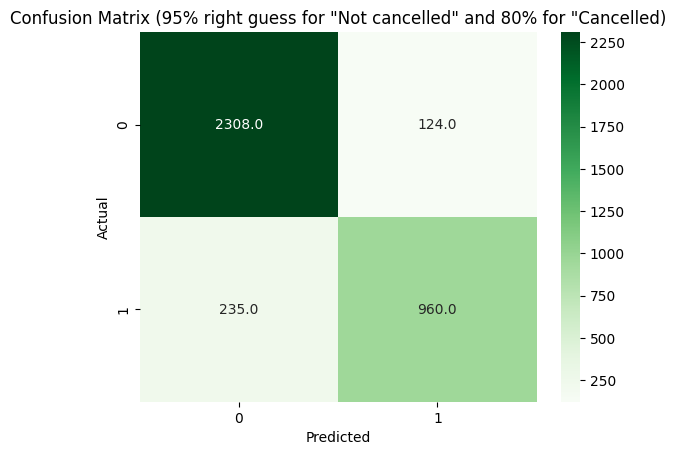

In [ ]:
sns.heatmap(cm, annot=True, cmap='Greens',fmt=".1f")
plt.title('Confusion Matrix ({}% right guess for "Not cancelled" and {}% for "Cancelled)'.format(percentage_right_not_canc , percentage_right_canc))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy Score

In [ ]:
accuracy_score(y_validation, predictions)

0.9010201268265784

In [ ]:
auc_result_rs_rf = roc_auc_score(y_validation, model_rs_rf.predict_proba(X_validation)[:,1])
print("AUC_ROC: %f" % (auc_result_rs_rf))

AUC_ROC: 0.950483


In [ ]:
results = pd.DataFrame(y_validation)

In [ ]:
results['predicted'] = predictions

In [ ]:
results['booking_status'] = results['booking_status'].map({0:'Not_Canceled', 1:'Canceled'})
results['predicted'] = results['predicted'].map({0:'Not_Canceled', 1:'Canceled'})

In [ ]:
results['right'] = (results['booking_status'] == results['predicted'])

In [ ]:
results

,booking_status,predicted,right
4373,Not_Canceled,Not_Canceled,True
21930,Canceled,Canceled,True
28309,Canceled,Canceled,True
8928,Not_Canceled,Not_Canceled,True
35293,Canceled,Canceled,True
...,...,...,...
2956,Not_Canceled,Not_Canceled,True
4430,Canceled,Canceled,True
12739,Not_Canceled,Not_Canceled,True
29570,Not_Canceled,Not_Canceled,True


In [ ]:
results_to_plot = results.groupby(['booking_status','right']).agg({'right':['count']})

In [ ]:
results_to_plot = results_to_plot.reset_index()
results_to_plot.columns = ['booking_status', 'hits', 'total']

<Axes: xlabel='booking_status', ylabel='total'>

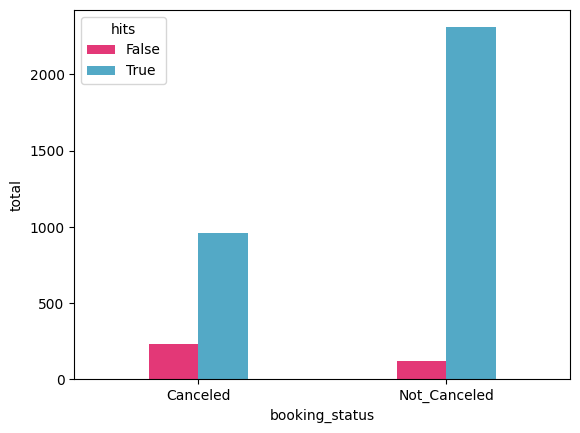

In [ ]:
sns.barplot(data = results_to_plot, x = 'booking_status', y = 'total', hue = 'hits', width = 0.4,
            palette = {True:'#40b2d9', False:'#ff1c70'})

#### Plot ROC Curve

In [ ]:
!pip install scikit-plot --quiet

import scikitplot as skplt

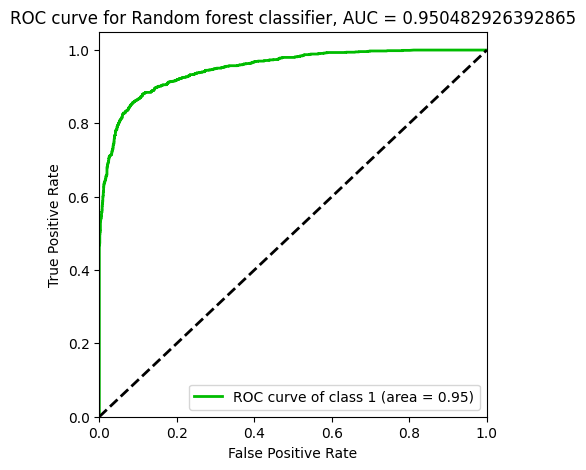

In [ ]:
skplt.metrics.plot_roc(y_validation, model_rs_rf.predict_proba(X_validation), classes_to_plot= 1,plot_micro= False, plot_macro = False, figsize = (5,5),
                       title='ROC curve for Random forest classifier, AUC = {}'.format(auc_result_rs_rf))

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                     'xtick.color':'black',
                     'ytick.color':'black',})
plt.show()

# Feature importance

In [ ]:
feature_importances = model_rs_rf.feature_importances_

In [ ]:
feature_names = model_rs_rf.feature_names_in_

In [ ]:
feature_dict = {}
for features in range(0, len(feature_names)):
  if (feature_names[features].split('_')[-1]).isnumeric():
    feature_names[features] = feature_names[features][:-2]
  if feature_names[features] not in feature_dict:
    feature_dict[feature_names[features]] = feature_importances[features]
  else:
    feature_dict[feature_names[features]] += feature_importances[features]

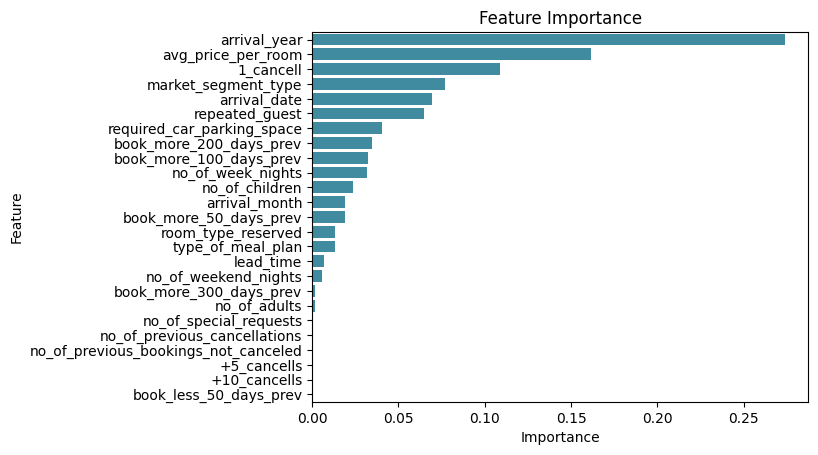

In [ ]:
feature_importance_df = pd.DataFrame(feature_dict.items())
feature_importance_df.columns = ['Feature' , 'Importance']
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
ax = sns.barplot(y='Feature', x='Importance', data=feature_importance_df, color = '#3194b0')
ax.set(xlabel = 'Importance', ylabel='Feature', title='Feature Importance',)
plt.show()